<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Tarea 4 - Machine Learning
### "Análisis de Datos y Modelado en Machine Learning: Registros Clínicos de Insuficiencia Cardíaca"
*26 de Octubre de 2024*

**Nombre Estudiante(s)**: Cristian Tobar - Andres Perez - Victor Saldivia


### **01. INTRODUCCIÓN**

Este conjunto de datos contiene los registros médicos de 299 pacientes que presentaron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas.

En este notebook se realiza un análisis exploratorio y realicación de modelos de Machine Learning del dataset [Historias clínicas de insuficiencia cardíaca][Uci] de UC Irvine.
https://doi.org/10.1186/s12911-020-1023-5

[Uci]: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records





### **02. OBJETIVO**

> "AQUÍ VA EL OBJETIVO"

### **03. METODOLOGÍA**

A continuación se describe el enfoque y flujo de trabajo para realizar un análisis completo y detallado de los datos, aplicar técnicas de modelado y evaluar el rendimiento de diferentes algoritmos. La metodología sigue un proceso estructurado que abarca los siguientes pasos:

#### 1. Carga y Preprocesamiento de Datos

   - **Carga de los datos:** Se inicia el proyecto cargando el dataset seleccionado, que contiene información relacionada con enfermedades cardíacas.
   - **Limpieza de datos:** Se eliminan los valores nulos y duplicados para asegurar la integridad de los datos. Además, se revisan las variables categóricas y numéricas para ver si se necesita aplicar transformaciones apropiadas, como la codificación de variables categóricas.

#### 2. Análisis Exploratorio de Datos

   - **Visualización de distribuciones:** Se generan gráficos como histogramas, boxplots y pairplots para explorar la distribución de las variables numéricas, detectar valores atípicos y entender la variabilidad de los datos.
   - **Mapa de calor de correlación:** Se construye un mapa de calor para observar las correlaciones entre variables, lo que puede ayudar a identificar patrones o relaciones lineales entre ellas.
   - **Distribución de la variable objetivo:** Se visualiza la variable objetivo, es decir, eventos de muerte en enfermedades cardíacas para entender su distribución y analizar los posibles desbalances en las clases.
   - **Escalado de variables numéricas:** Después del análisis exploratorio, se estandarizan las variables numéricas a una escala común (media = 0, desviación estándar = 1). Esto es particularmente importante para los modelos que son sensibles a la escala de los datos, como el PCA y K-means.

#### 3. Selección y Aplicación de Modelos

   - **Modelos No Supervisados (Análisis de Componentes Principales - PCA y K-means):**
     - **PCA:** Se utiliza PCA para reducir la dimensionalidad para simplificar los datos y eliminar redundancias en las variables. Esto permite visualizar la estructura de los datos en menos dimensiones y facilita el análisis para los modelos supervisados.
     - **K-means:** Como técnica de agrupamiento, se aplica K-means para identificar grupos o clusters naturales en los datos, proporcionando una vista alternativa de los datos y permitiendo segmentar el conjunto en función de características similares.

   - **Modelos Supervisados:**
     - **Regresión Logística:** Se emplea como modelo base para predecir la probabilidad de ocurrencia de la variable objetivo (por ejemplo, muerte por enfermedad cardíaca), ideal para problemas de clasificación binaria.
     - **Naive Bayes:** Este modelo probabilístico es útil en tareas de clasificación y se selecciona para comparar su rendimiento frente a otros modelos supervisados. Utiliza las probabilidades de cada característica para hacer predicciones.
     - **Comparación de Modelos:** Una vez aplicados los modelos supervisados, se evaluará el rendimiento de cada uno utilizando métricas como la precisión, recall, F1-score, y el área bajo la curva ROC (AUC) para la comparación. La metodología se basa en identificar el modelo que mejor se ajusta al objetivo del análisis y proporciona los resultados más confiables.

#### 4. Conclusiones Basadas en los Hallazgos

   - **Análisis de Resultados:** Se interpretan los resultados de los modelos y se comparan sus rendimientos en función de las métricas establecidas, evaluando su aplicabilidad al contexto de análisis.
   - **Recomendaciones:** Con base en el modelo con mejor rendimiento, se sugieren recomendaciones prácticas y acciones futuras para el manejo de la enfermedad cardíaca, o cualquier otro contexto en el que se aplique este análisis.
   - **Limitaciones:** Finalmente, se comentan las limitaciones del análisis y las posibles mejoras en los datos o los modelos, que podrían fortalecer futuros estudios o implementaciones.


La idea es emplear esta metodología estructurada para entender los datos, aplicar técnicas de modelado predictivo y evaluar el rendimiento de los algoritmos antes mencionados. La combinación de modelos supervisados y no supervisados permitirá obtener una visión más completo de los datos y generar conclusiones basadas en hallazgos sólidos.


### **CARGA Y PREPROCESAMIENTO DE DATOS**
Comenzamos con la carga y preprocesamiento de los datos para entender sus características

#### Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score,  f1_score 
import requests 
from io import StringIO


In [2]:
# Fetch Dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data
X_features = heart_failure_clinical_records.data.features 
y_targets = heart_failure_clinical_records.data.targets  #Variables

In [3]:
# Concatenar X e y en un nuevo DataFrame
new_df = pd.concat([X_features, y_targets], axis=1)

# Visualización de los primeros 5 filas del nuevo DataFrame
print("\u001b[1mPRIMERAS (5) FILAS\u001b[0m")
new_df.head()

PRIMERAS (5) FILAS


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### DIMENSIONES

In [4]:
print("Filas:",new_df.shape[0]) 
print("Columnas:",new_df.shape[1],"\n") 

Filas: 299
Columnas: 13 



#### INFORMACIÓN GENERAL

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


| Variable   | Descripción                                                                 |
|------------|----|
| `age`   | Edad del paciente                    |
| `anaemia`     | Disminución de glóbulos rojos o hemoglobina (0 =False , 1= True)                                                |
| `creatinine_phosphokinase`      | Nivel de la enzima CPK en la sangre (mg/L)                                           |
| `diabetes`      | Si el paciente tiene diabetes (0 =False , 1= True)                                                   |
| `ejection_fraction`    | Porcentaje de sangre que sale del corazón en cada contracción (%)                                        |
| `high_blood_pressure`    |Si el paciente tiene hipertensión (0 =False , 1= True)                                               |
| `platelets`   | Plaquetas en la sangre (kiloplaquetas/mL)                                                            |
| `serum_creatinine`     | Nivel de creatinina sérica en la sangre (mg/dl)                                                           |
| `serum_sodium`     | Nivel de sodio sérico en la sangre (mEq/L)                                                           |
| `sex` | mujer o hombre (0 =Woman , 1= Men)         |
| `smoking` | Si el paciente fuma o no (0 =False , 1= True)         |
| `time` | Período de seguimiento (días)         |
| `death_event` | Si el paciente falleció durante el período de seguimiento (0 =False , 1= True)       |

#### RESUMEN ESTADÍSTICO

In [6]:
new_df.describe().round(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000,299.000
mean,60.834,0.431,581.839,0.418,38.084,0.351,263358.029,1.394,136.625,0.649,0.321,130.261,0.321
std,11.895,0.496,970.288,0.494,11.835,0.478,97804.237,1.035,4.412,0.478,0.468,77.614,0.468
min,40.000,0.000,23.000,0.000,14.000,0.000,25100.000,0.500,113.000,0.000,0.000,4.000,0.000
25%,51.000,0.000,116.500,0.000,30.000,0.000,212500.000,0.900,134.000,0.000,0.000,73.000,0.000
50%,60.000,0.000,250.000,0.000,38.000,0.000,262000.000,1.100,137.000,1.000,0.000,115.000,0.000
75%,70.000,1.000,582.000,1.000,45.000,1.000,303500.000,1.400,140.000,1.000,1.000,203.000,1.000
max,95.000,1.000,7861.000,1.000,80.000,1.000,850000.000,9.400,148.000,1.000,1.000,285.000,1.000


#### CONTAR LA CANTIDAD DE OCURRENCIAS DE CADA EVENTO DE MUERTE


In [7]:
print(new_df['death_event'].value_counts())

death_event
0    203
1     96
Name: count, dtype: int64


#### CONTAR LA CANTIDAD DE OCURRENCIAS POR ANEMIA


In [8]:
print(new_df['anaemia'].value_counts())

anaemia
0    170
1    129
Name: count, dtype: int64


### **ANÁLISIS EXPLORATORIO DE DATOS**
La visualización de datos es fundamental en el análisis de datos y el aprendizaje automático, ya que permite explorar, entender y comunicar la información de manera efectiva.

Se presentan los siguientes gráficos:
- Histrograma
- Boxplot.
- Histrograma de densidades.
- Mapa de Calor.

#### Distribución de la Variable Objetivo

En este caso, estamos analizando si existe una condición de enfermedad cardíaca en los pacientes, donde 0 indica que no se presentó un evento de enfermedad y 1 indica la ocurrencia de dicho evento. Visualizar esta variable es fundamental para entender si las clases están equilibradas o desbalanceadas, lo cual puede influir en la selección y desempeño de los modelos de aprendizaje automático.



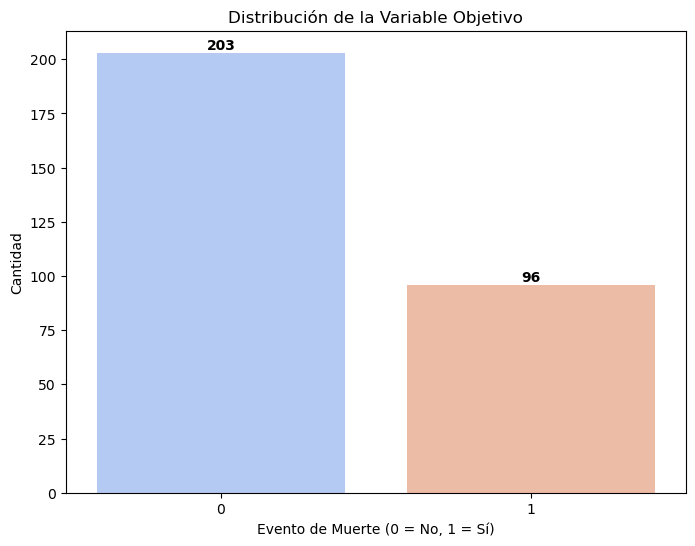

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='death_event', data=new_df, hue='death_event', palette="coolwarm", dodge=False, legend=False)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel("Evento de Muerte (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")

# Etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontweight='bold')

plt.show()

#### Distribución de las Variables Numéricas Mediante Histogramas

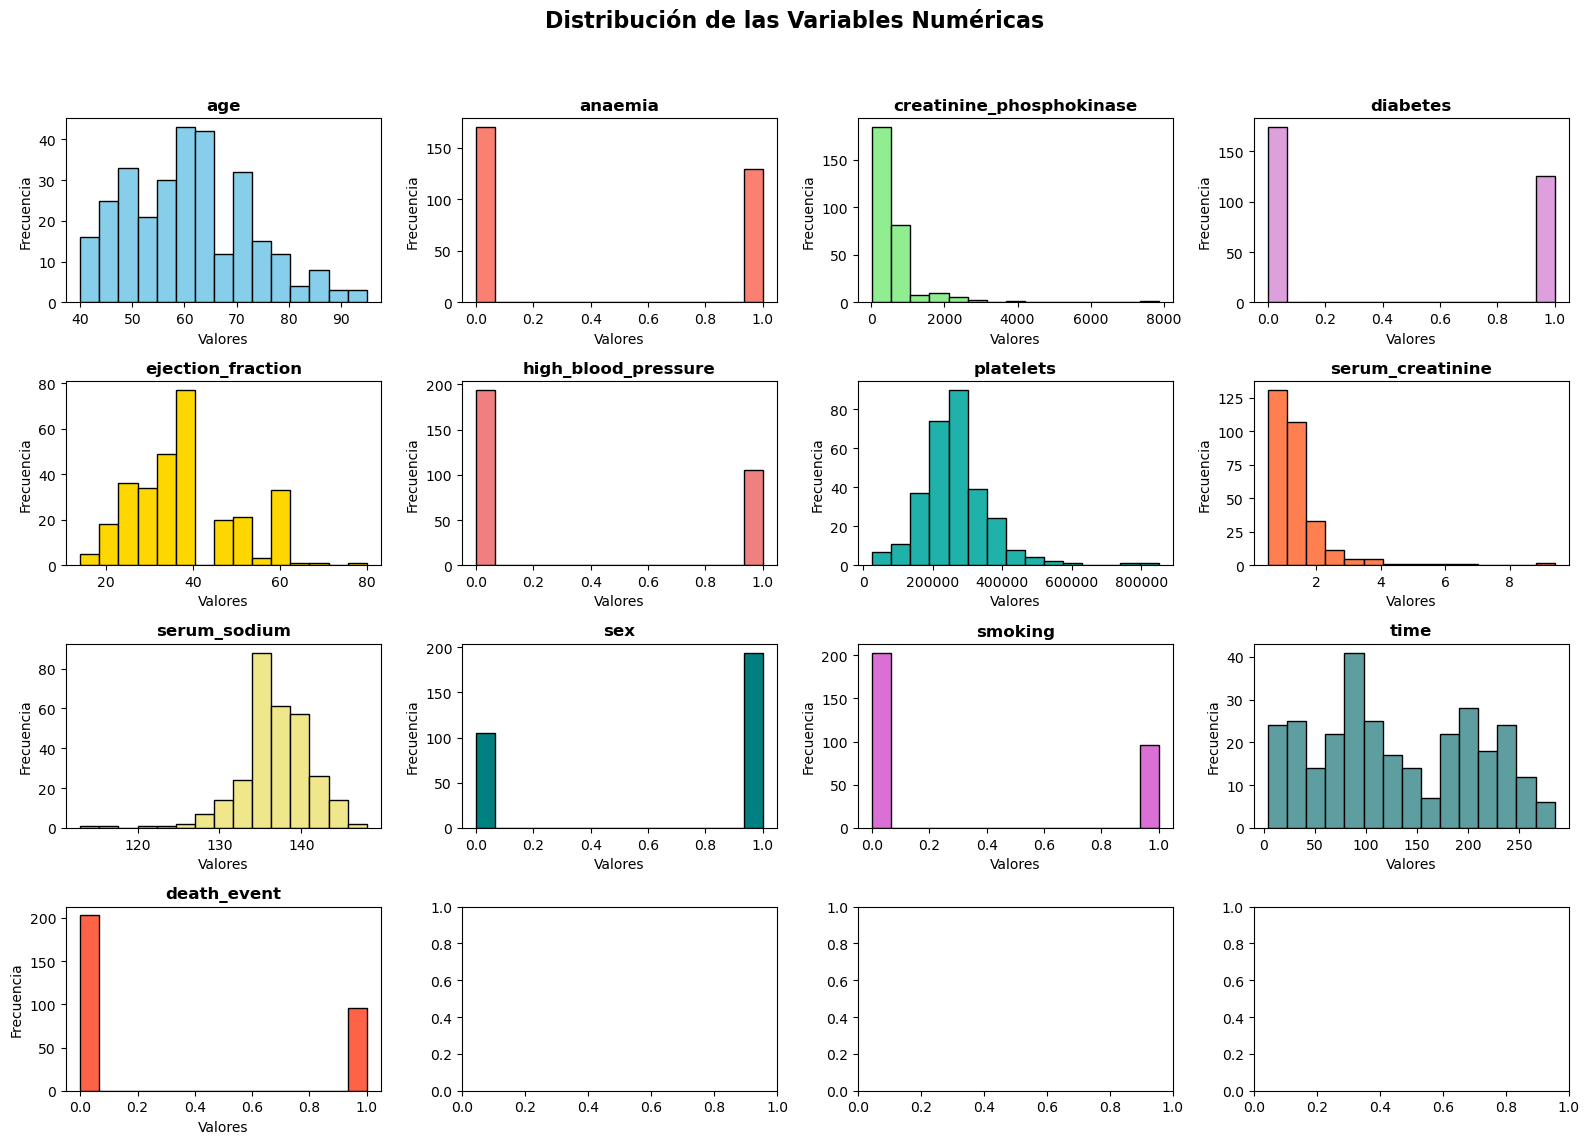

In [13]:
# Personalización de los histogramas
fig, axes = plt.subplots(len(new_df.columns) // 4 + 1, 4, figsize=(16, 12))  # Ajustar número de filas y columnas
fig.suptitle("Distribución de las Variables Numéricas", fontsize=16, fontweight='bold')

# Colores
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'gold', 'lightcoral', 'lightseagreen', 'coral', 
          'khaki', 'teal', 'orchid', 'cadetblue', 'tomato']

for idx, column in enumerate(new_df.columns):
    ax = axes[idx // 4, idx % 4]
    ax.hist(new_df[column], bins=15, color=colors[idx % len(colors)], edgecolor='black')
    ax.set_title(column, fontsize=12, fontweight='bold')
    ax.set_xlabel("Valores", fontsize=10)
    ax.set_ylabel("Frecuencia", fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Distribución de Variables Numéricas mediante Boxplots

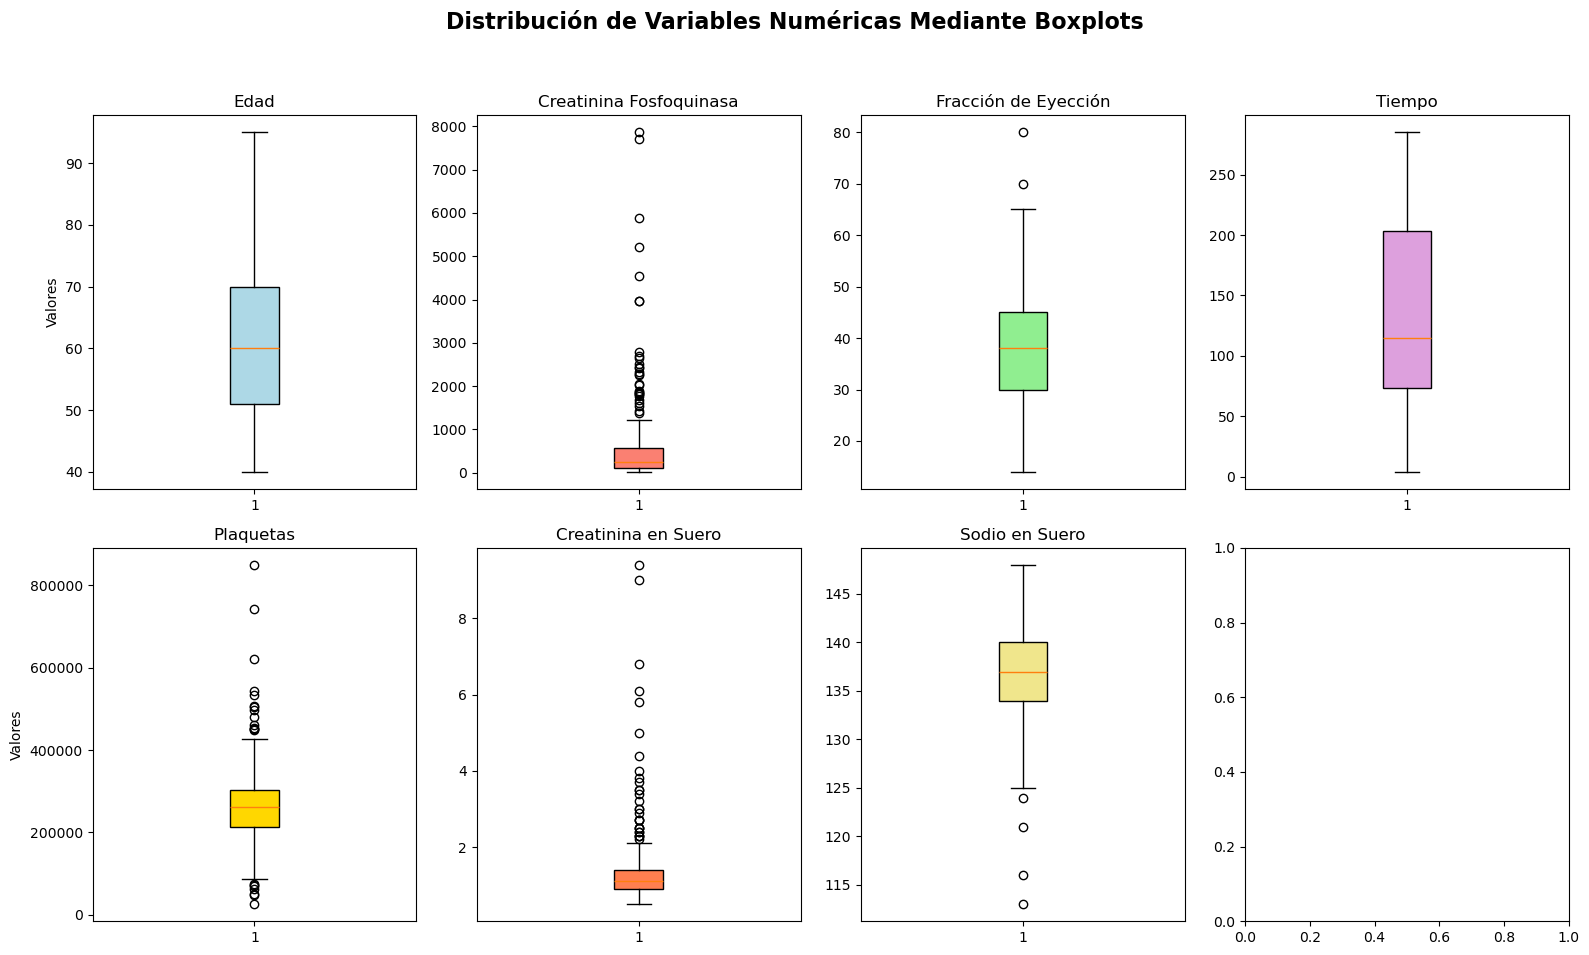

In [18]:
# Título para los gráficos de boxplot
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
fig.suptitle("Distribución de Variables Numéricas Mediante Boxplots", fontsize=16, fontweight='bold')

# Colores personalizados para los boxplots
boxplot_colors = ['lightblue', 'salmon', 'lightgreen', 'plum', 'gold', 'coral', 'khaki']

# Añadir cada boxplot con colores personalizados y etiquetas
axes[0, 0].boxplot(new_df['age'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[0]))
axes[0, 0].set_title('Edad', fontsize=12)
axes[0, 0].set_ylabel('Valores')

axes[0, 1].boxplot(new_df['creatinine_phosphokinase'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[1]))
axes[0, 1].set_title('Creatinina Fosfoquinasa', fontsize=12)

axes[0, 2].boxplot(new_df['ejection_fraction'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[2]))
axes[0, 2].set_title('Fracción de Eyección', fontsize=12)

axes[0, 3].boxplot(new_df['time'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[3]))
axes[0, 3].set_title('Tiempo', fontsize=12)

axes[1, 0].boxplot(new_df['platelets'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[4]))
axes[1, 0].set_title('Plaquetas', fontsize=12)
axes[1, 0].set_ylabel('Valores')

axes[1, 1].boxplot(new_df['serum_creatinine'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[5]))
axes[1, 1].set_title('Creatinina en Suero', fontsize=12)

axes[1, 2].boxplot(new_df['serum_sodium'], patch_artist=True, boxprops=dict(facecolor=boxplot_colors[6]))
axes[1, 2].set_title('Sodio en Suero', fontsize=12)

# Ajustar el diseño para que no se superpongan
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Relaciones entre Variables: Análisis Exploratorio de Correlaciones y Distribuciones

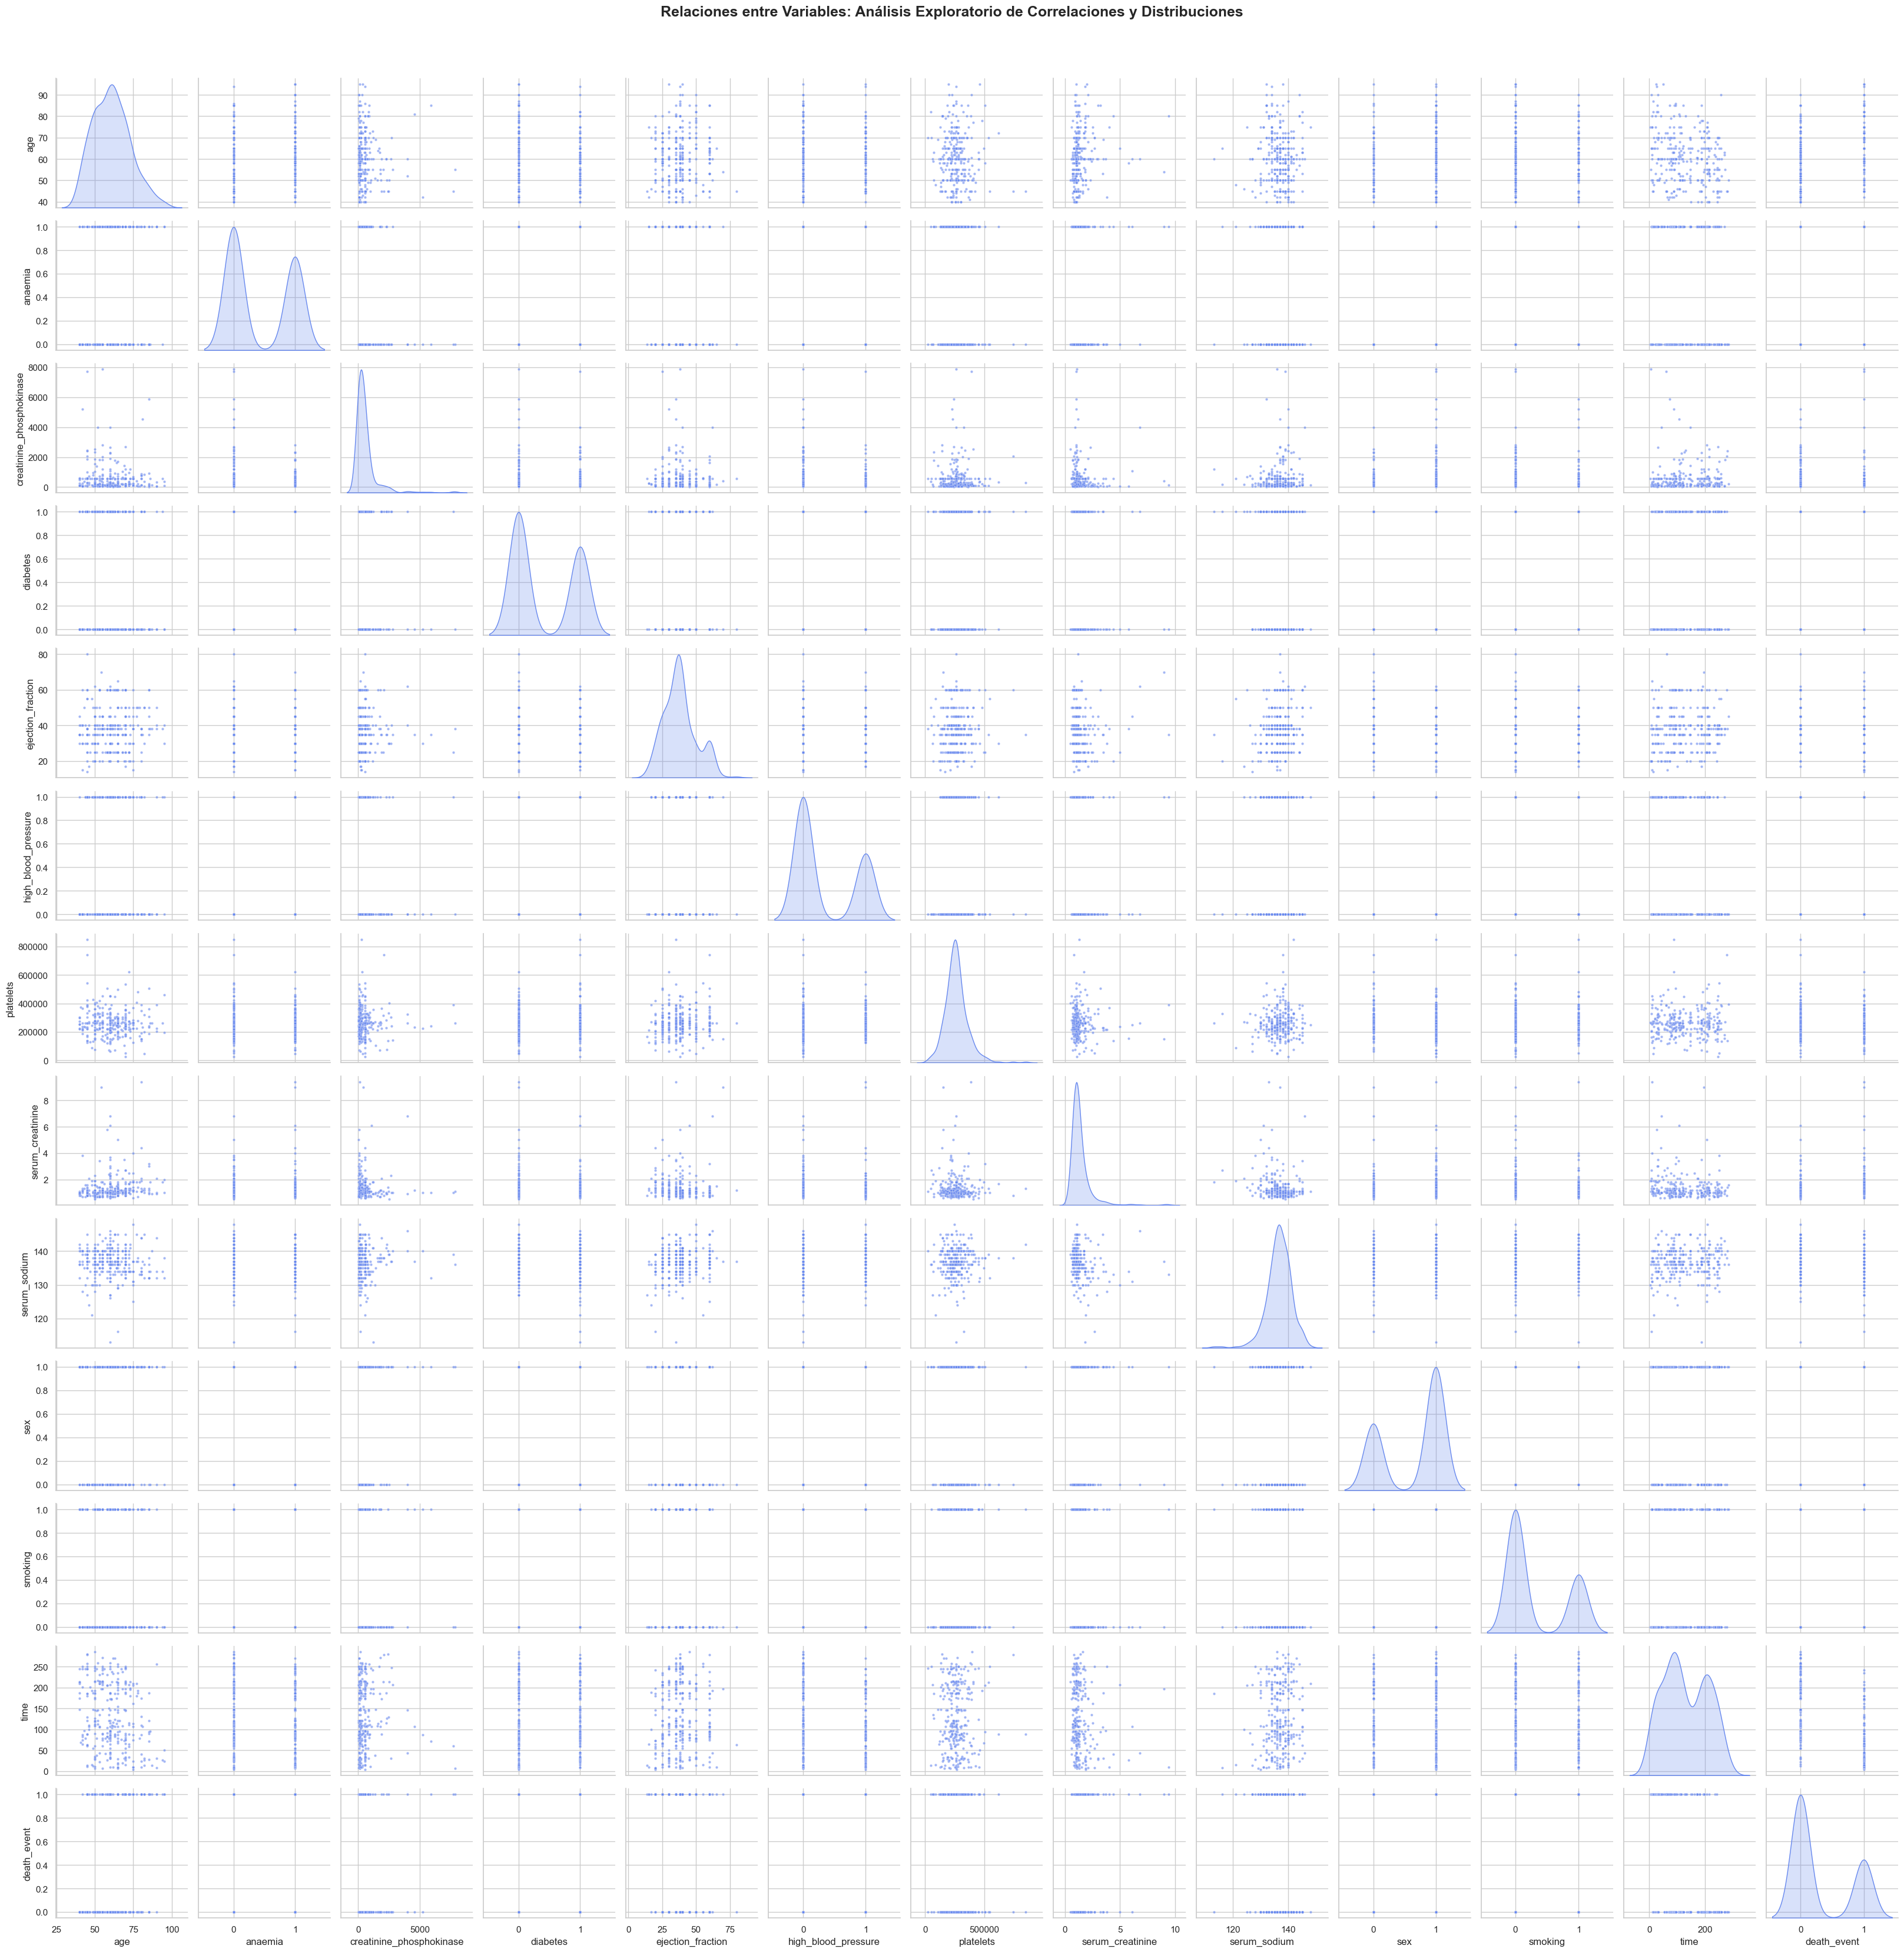

In [19]:
# Establecer el estilo y la paleta de colores
sns.set(style="whitegrid", palette="coolwarm")

# Crear el pairplot personalizado
pairplot = sns.pairplot(new_df, diag_kind='kde', plot_kws={'s': 10, 'alpha': 0.6}, height=2.5)

# Añadir título principal
pairplot.fig.suptitle("Relaciones entre Variables: Análisis Exploratorio de Correlaciones y Distribuciones", 
                      fontsize=18, fontweight='bold', y=1.02)

# Ajustar el diseño para mejorar la estética
pairplot.fig.tight_layout()
plt.show()

#### Mapa de Calor de Correlación entre Variables

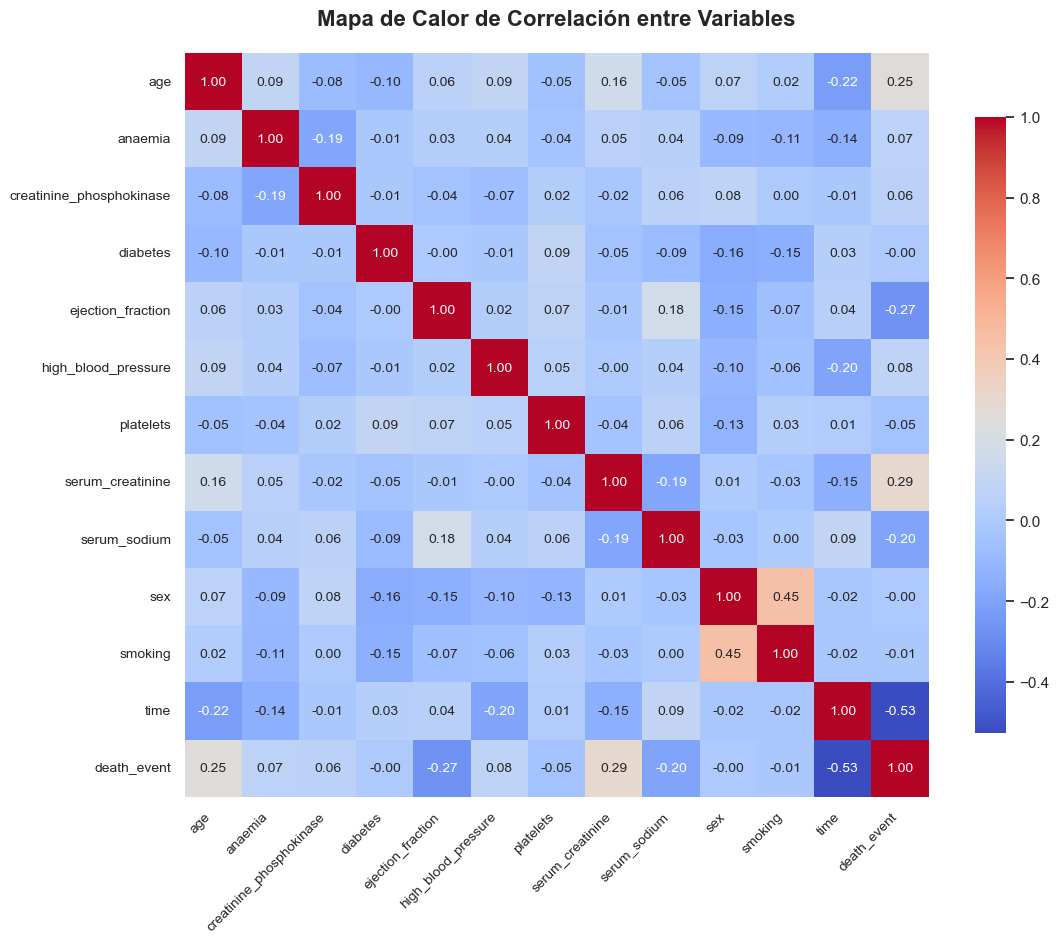

In [21]:
# Mapa de calor personalizado
plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f", cbar_kws={"shrink": .8})

plt.title("Mapa de Calor de Correlación entre Variables", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


### **ESTANDARIZAR VARIABLES**
La estandarización transforma las variables para que tengan una media de 0 y una desviación estándar de 1. Esto es especialmente útil cuando las características de los datos tienen diferentes unidades de medida o rangos.

In [17]:
# Separar características y variable objetivo
x = new_df.drop(columns='death_event')
y = new_df['death_event']

# Ajustar y transformar los datos
X_stand = StandardScaler(with_std=True, with_mean=True).fit_transform(x)

# Convertir el array estandarizado a un DataFrame
new_df_stand = pd.DataFrame(X_stand,columns = x.columns)

# Añadir la columna death_event
new_df_stand['death_event'] = y.values

new_df_stand.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1


### **ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)**
Técnica de reducción de dimensionalidad que transforma un conjunto de datos con muchas variables en un conjunto de datos con menos variables, que capturan la mayor parte de la variabilidad de los datos originales. PCA es ampliamente utilizado para simplificar datos, reducir la redundancia y visualizar datos en 2 o 3 dimensiones.

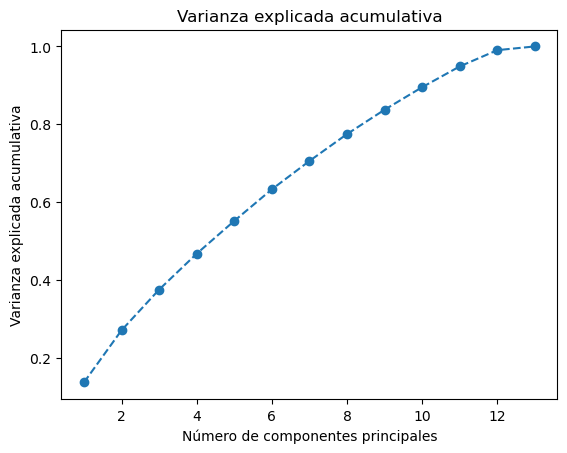

In [18]:
# Crear una instancia PCA
pca = PCA()

# Aplicar PCA a los datos estandarizados
principal_components = pca.fit_transform(new_df_stand)

# Explorar la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

**Decisión:** Se elige usar 12 componentes, los cuales explican más del 90% de la varianza.


In [19]:
variance_explained = pca.explained_variance_ratio_[0:11].sum().round(4)*100
print(f"{variance_explained}%")

94.86%


In [20]:
n_components = 12
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(new_df_stand)

# Datos reducidos a n_components características
pc_df= pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

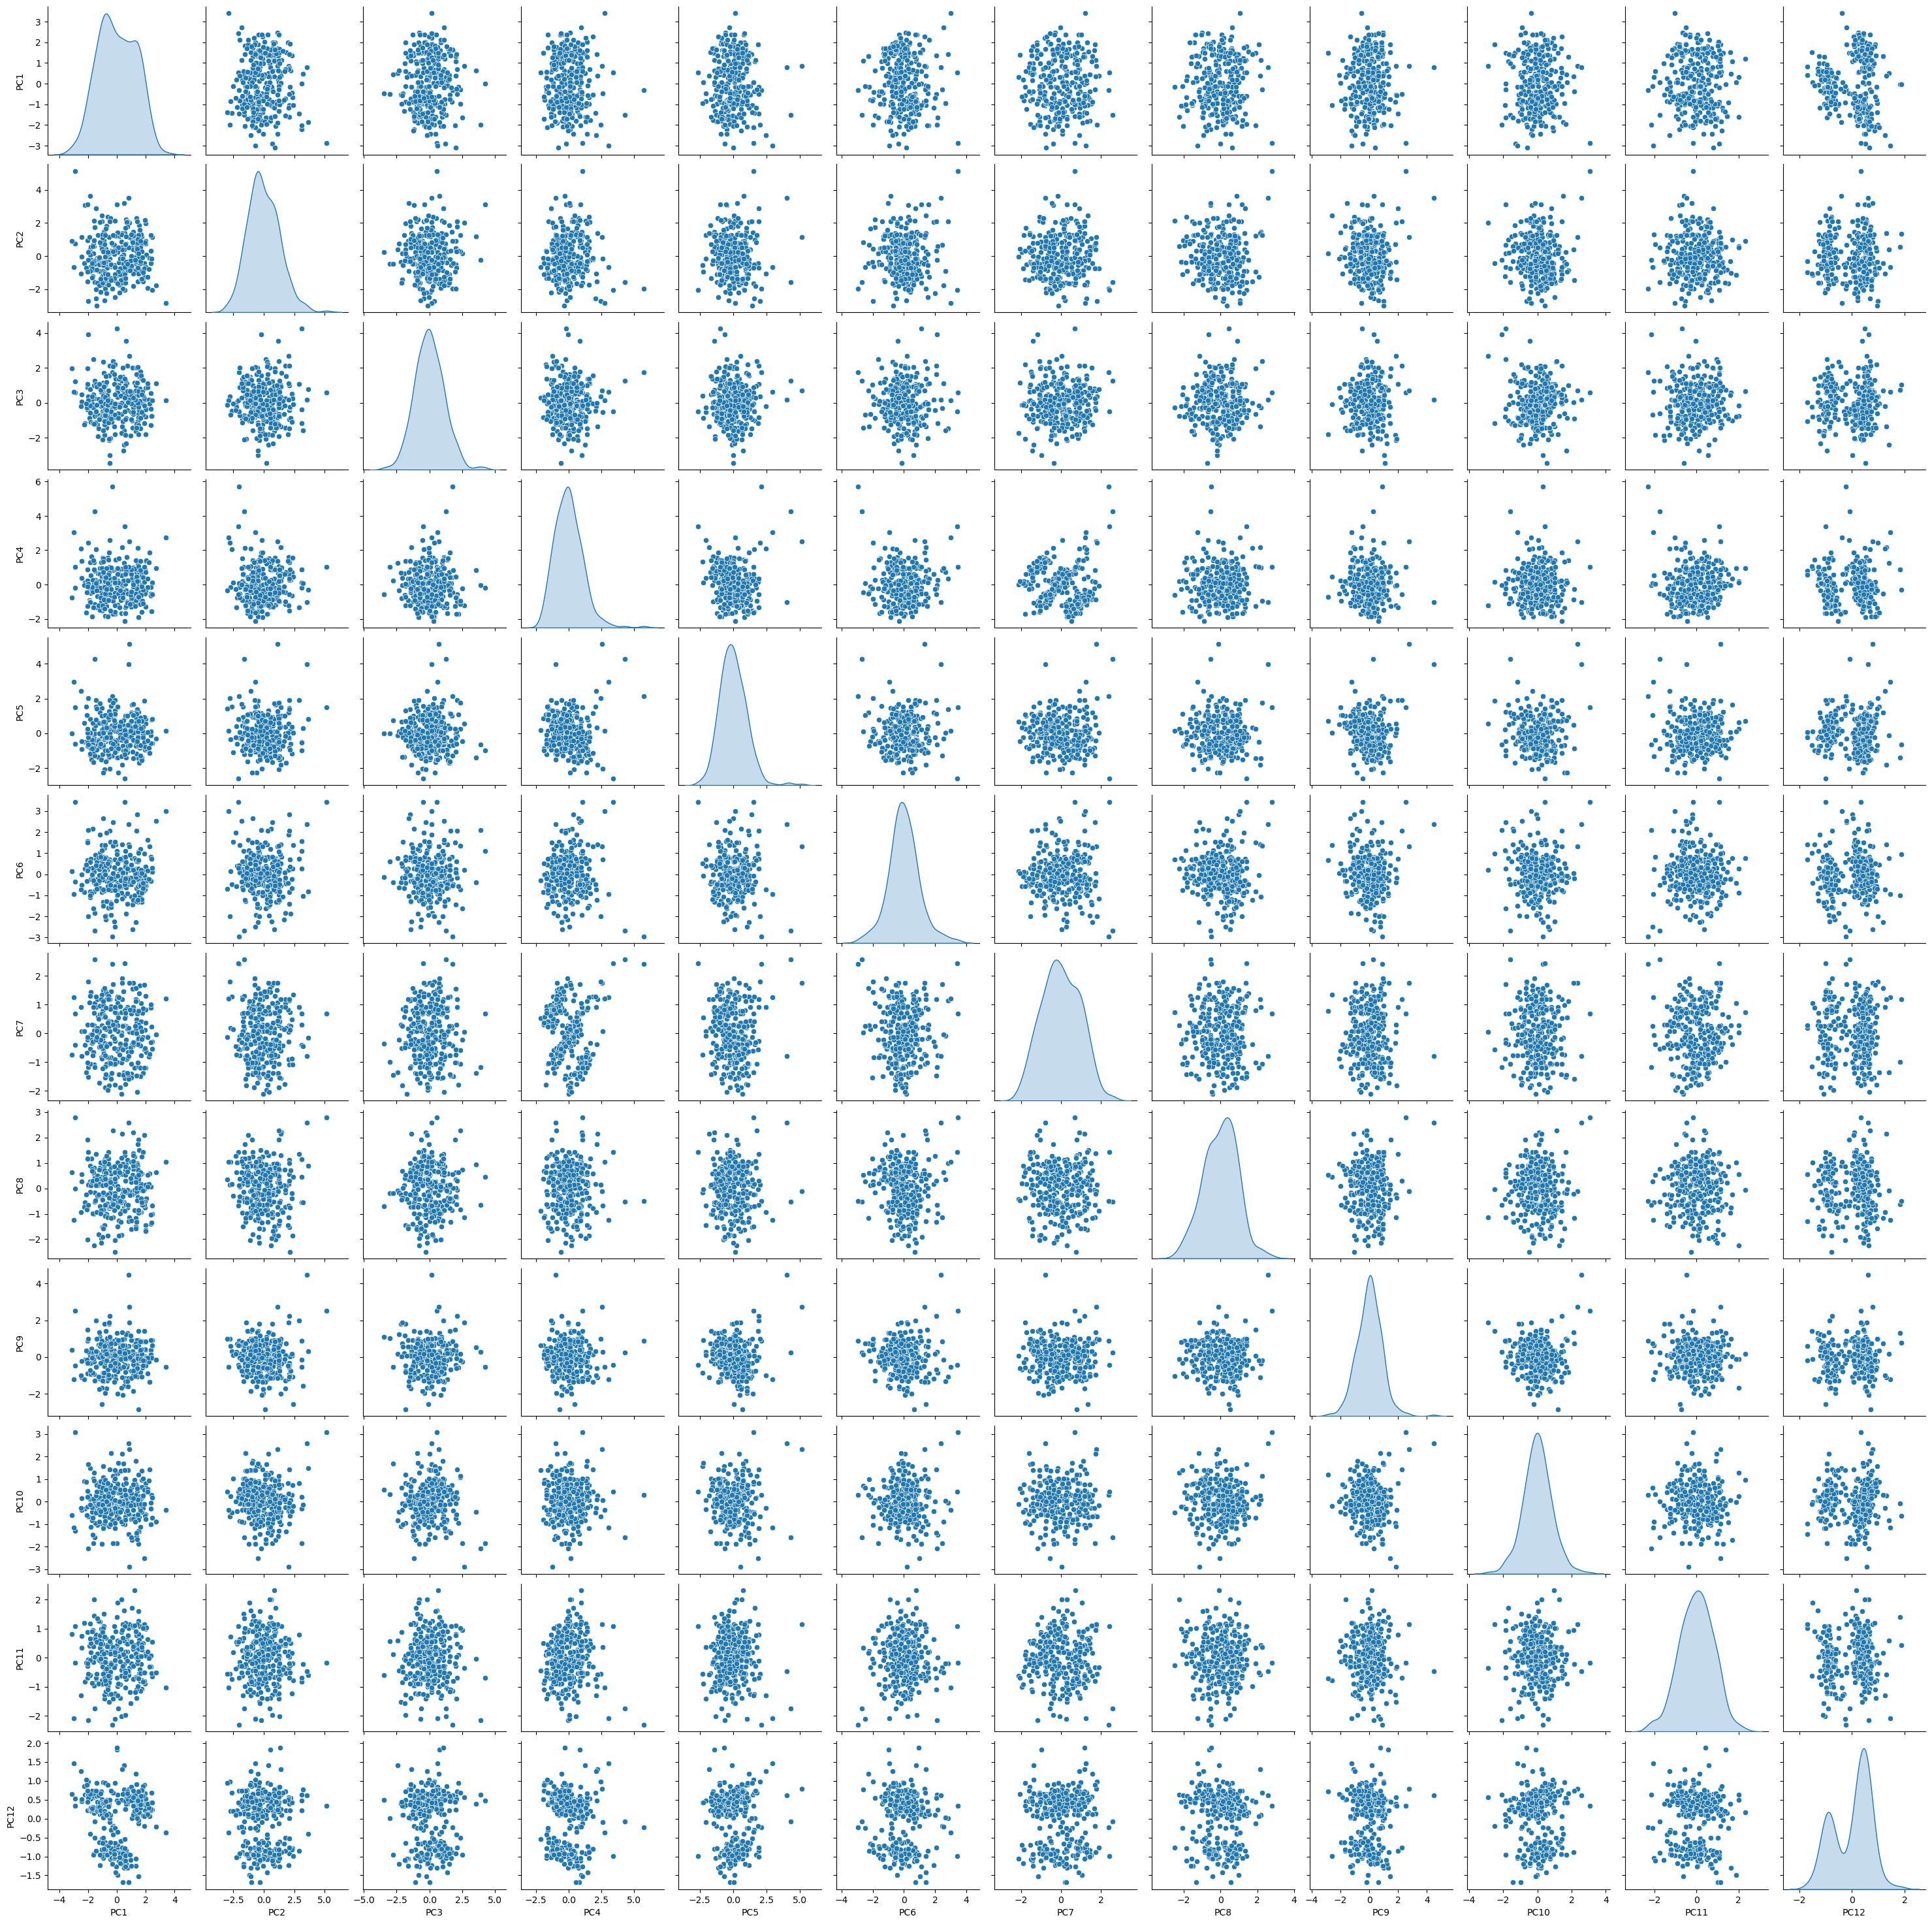

In [21]:
# Visualización de componentes principales
sns.pairplot(pc_df, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

### IMPORTANCIA DE LAS VARIABLES DE CADA COMPONENTE
Las variables principales se pueden obtener directamente desde el objeto PCA después de haber ajustado el modelo los datos. Estas variables se interpretan cada característica contribuye a cada componente principal.

In [22]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=new_df.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("\u001b[1mCARGAS DE VARIABLES EN CADA COMPONENTE PRINCIPAL:\u001b[0m")
print(top_loadings)

CARGAS DE VARIABLES EN CADA COMPONENTE PRINCIPAL:
                 PC1                  PC2                  PC3  \
0                sex                 time         serum_sodium   
1            smoking                  age    ejection_fraction   
2           diabetes     serum_creatinine             diabetes   
3  ejection_fraction              anaemia     serum_creatinine   
4          platelets  high_blood_pressure  high_blood_pressure   

                        PC4                       PC5  \
0                 platelets  creatinine_phosphokinase   
1  creatinine_phosphokinase          serum_creatinine   
2                   anaemia         ejection_fraction   
3       high_blood_pressure       high_blood_pressure   
4                      time                   smoking   

                        PC6                       PC7                PC8  \
0                 platelets                   anaemia           diabetes   
1         ejection_fraction       high_blood_pressure     

#### GRÁFICOS DE BARRAS PARA LAS VARIABLES MÁS CORRELACIONADAS CON CADA COMPONENTE PRINCIPAL

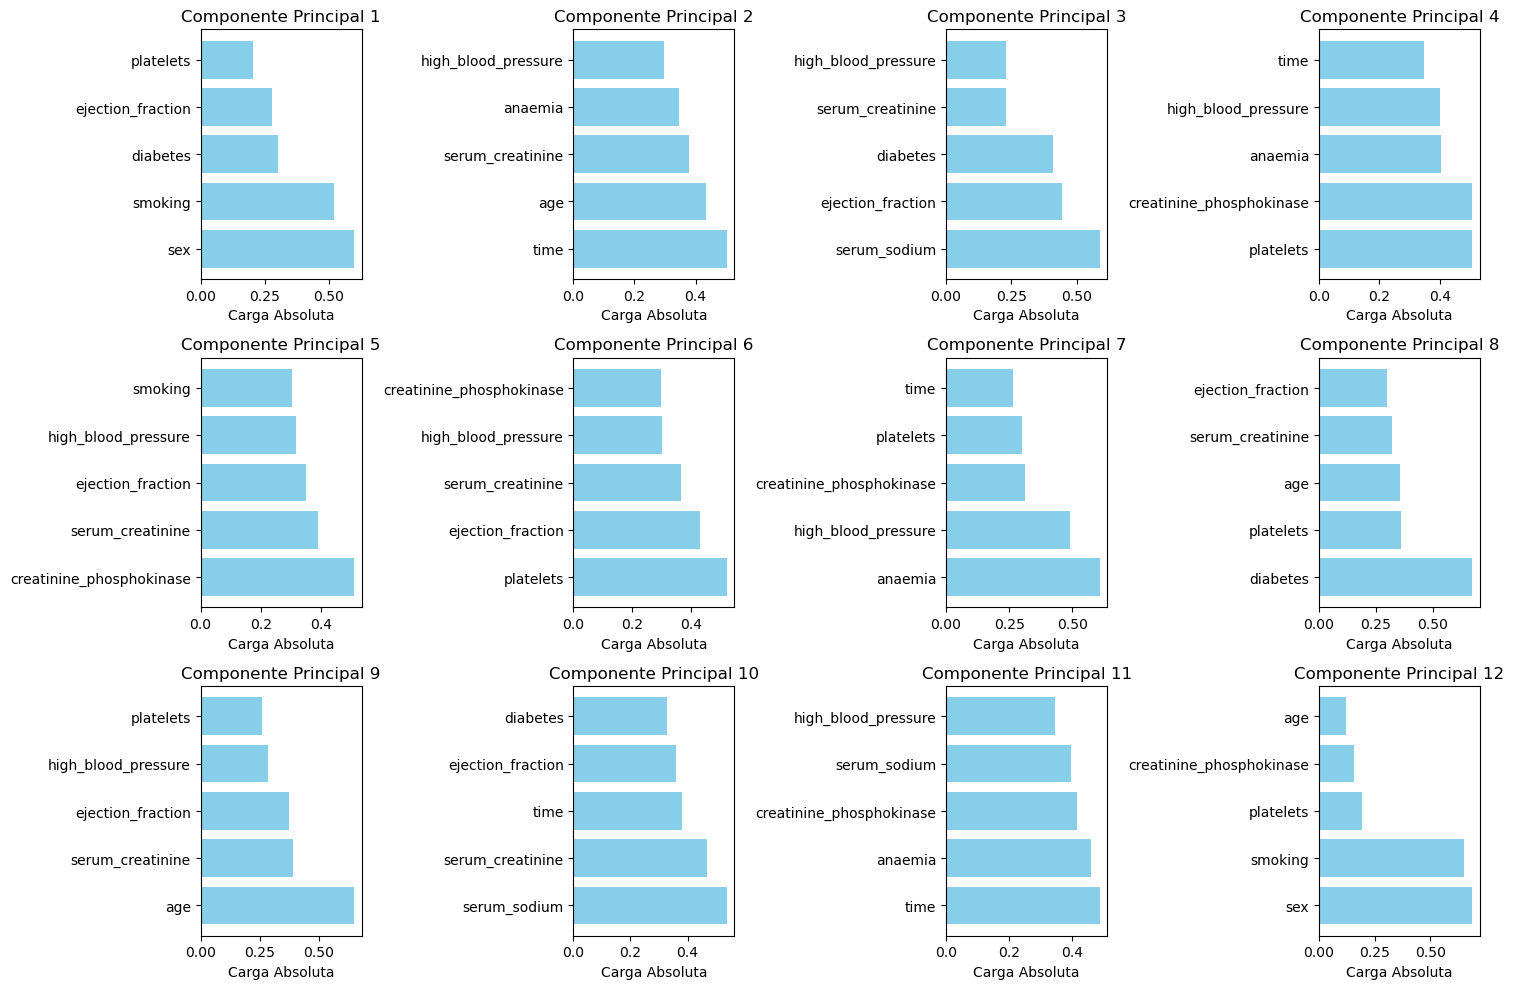

In [23]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

### **NAIVE BAYES**

In [24]:
modelo = GaussianNB()

# Quienes estan en la muestra de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(pc_df, y, train_size = 0.7, random_state=1234)

# Ajuste del modelo
modelo.fit(X_train, y_train)

#Predicción del conjunto de prueba
y_pred = modelo.predict(X_test)

#### MATRIZ DE CONFUSIÓN

Text(0.5, 1.0, 'Matriz de Confusión')

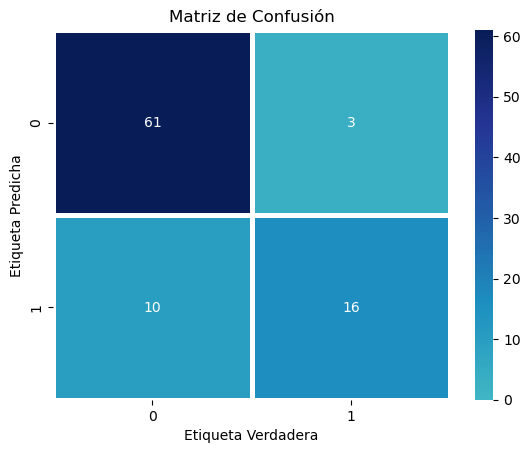

In [25]:
# Graficar la matriz de confusión, compara los valores que se están prediciendo en el modelos con los valores reales.
df_final=np.array(confusion_matrix(y_test,y_pred))

sns.heatmap(df_final, linewidths= 3.5, cmap="YlGnBu", center=0, vmin=0, annot=True, fmt="d")
plt.xlabel('Etiqueta Verdadera')
plt.ylabel('Etiqueta Predicha')
#plt.title('Matriz de Confusión')
plt.gca().set_title("Matriz de Confusión") # Agregamos la función set_title

In [26]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred, average=None)))
print('Recall score: ', format(recall_score(y_test, y_pred, average=None)))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='micro'))

Accuracy score:  0.8555555555555555
Precision score:  [0.85915493 0.84210526]
Recall score:  [0.953125   0.61538462]
F1: 0.856


In [27]:
report = classification_report(y_test, y_pred)
# Convertir a DataFrame
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.84      0.62      0.71        26

    accuracy                           0.86        90
   macro avg       0.85      0.78      0.81        90
weighted avg       0.85      0.86      0.85        90

